In [162]:
#imports 
import numpy as np
import random
import matplotlib.pyplot as plt

In [88]:
#serial enconder

one_hot_g = [1,0]
one_hot_r = [0,1]

for i in range(1):
    LC_i = LC[i]
    encoder_input= []
    band_concat= []
    for j in range(len(LC_i['time'])):
        u_i = LC_i['flux']
        log_u_i_j = np.array(np.log(u_i[j]))
        if LC_i['banda'] == 1:
            band_concat_j=np.append(log_u_i_j, one_hot_g)
        else:
            band_concat_j=np.append(log_u_i_j, one_hot_r)
        band_concat.append(band_concat_j)
    print(band_concat)

[array([3.17805383, 0.        , 1.        ]), array([3.98898405, 0.        , 1.        ]), array([3.49650756, 0.        , 1.        ]), array([4.18965474, 0.        , 1.        ]), array([1.09861229, 0.        , 1.        ]), array([4.44265126, 0.        , 1.        ]), array([3.91202301, 0.        , 1.        ]), array([3.55534806, 0.        , 1.        ]), array([4.55387689, 0.        , 1.        ]), array([4.02535169, 0.        , 1.        ]), array([4.35670883, 0.        , 1.        ]), array([3.78418963, 0.        , 1.        ]), array([3.36729583, 0.        , 1.        ]), array([4.4308168, 0.       , 1.       ]), array([4.58496748, 0.        , 1.        ]), array([4.09434456, 0.        , 1.        ]), array([4.33073334, 0.        , 1.        ]), array([4.27666612, 0.        , 1.        ]), array([4.47733681, 0.        , 1.        ]), array([3.17805383, 0.        , 1.        ]), array([3.36729583, 0.        , 1.        ]), array([4.51085951, 0.        , 1.        ]), array([3.828

## Supernova parametric model (SPM)

Existen 4 tipos de supernovas: SNIbc, SNIa, SNII, SLSN

In [165]:
def SPM(t, A, t_0, t_1, B, t_rise, t_fall):
    gamma = t_1 - t_0
    s = 0.2
    F = []
    
    for t_i in t:
        # g(t)
        arg = s*(t_i-(gamma+t_0))
        g = 1/(1 + np.exp(- arg))
        
        # F_early and F_late
        x_early = A*(1-B*((t_i-t_0)/gamma))
        x_late = (A*(1-B)*np.exp(gamma/t_fall))
        y = (1+np.exp(-(t_i-t_0)/t_rise))
        
        F_early = x_early/y
        F_late = x_late/y
        
        #F_sne
        F_i = F_early*(1-g) + F_late*g
        F.append(F_i)
        
    return F

In [168]:
# parameters

#Amplitud: cerca de 20
#t0: timpo inicial
#t_1: tiempo en que empieza a transisionar la SN
#gamma: controls the time duration of the SN-plateau region
#beta: controls the slope of the SN-plateau region (pendiente)
#t_rise: controls the required time to reach the maximum brightness along the light-curve
#t_fall: controls the brightness decay time along and after the SN-plateau region

A = 50
t_0 = 58600
t_1 = 58640
B = 0.7
t_rise = 25
t_fall = 60


100


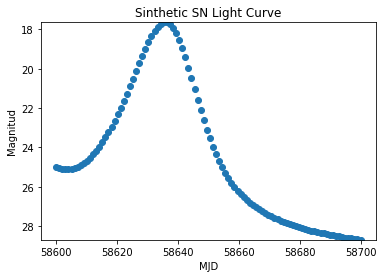

In [169]:
t = np.linspace(58600,58700,100)
F = SPM(t, A, t_0, t_1, B, t_rise, t_fall)
print(len(F))

plt.plot(t, F, 'o')
plt.title("Sinthetic SN Light Curve")
plt.xlabel("MJD")
plt.ylabel("Magnitud")
plt.ylim(max(F),min(F))
plt.show()

## Serial Encoder

In [ ]:
# Temporal Modulation







In [ ]:
import torch
import torch.nn as nn

class SelfAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(SelfAttention, slef).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads
        
        assert (self.head_dim * heads == embed_size), "Embed size needs to be div by heads"
        
        self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.fc_out = nn.Linear(heads*self.head_dim, embed_size, bias=False)
        